All the necessary beauty:

In [49]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize']=12,10
import seaborn as sns

import itertools as it
import pandas as pd
import numpy as np
#import os

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

import itertools as it
from itertools import combinations

import scipy as sp

from sklearn.feature_extraction.text import CountVectorizer

from sklearn import linear_model

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline



Implementation of class ridge regression:

In [220]:
class Ridge():
    #using beta for lambda to avoid python conflict

    def __init__(self, num_iters=2000, alpha=0.1, beta=0.1):
        
        self.num_iters = num_iters
        
        self.alpha = alpha
        
        self.beta = beta

    def _compute_cost(self, X, y, w, beta):

        m = X.shape[0]
        
        J = (1. / (2. * m)) * \
            (np.sum((np.dot(X, w) - y) ** 2.) + beta * np.dot(w.T, w))
            
        return J

    def _gradient_descent(self, X, y, w, num_iters, alpha, beta):
        
        m = X.shape[0]
        # Keep a history of Costs (for visualisation)
        J_all = np.zeros((num_iters, 1))
        # perform gradient descent
        for i in range(num_iters):
            #             print('GD: w: {0}'.format(w.shape))
            J_all[i] = self._compute_cost(X, y, w, beta)

            w = w - (alpha / m) * \
                (np.dot(X.T, (X.dot(w) - y[:, np.newaxis])) + beta * w)

        return w, J_all

    def fit(self, X, y):
        """Fit the model
        """
        Xn = np.ndarray.copy(X)
        yn = np.ndarray.copy(y)

        # initialise w params for linear model, from w0 to w_num_features
        w = np.zeros((Xn.shape[1] + 1, 1))

        # normalise the X
        self.X_mean = np.mean(Xn, axis=0)
        self.X_std = np.std(Xn, axis=0)
        Xn -= self.X_mean
        self.X_std[self.X_std == 0] = 1
        Xn /= self.X_std
        
        
        self.y_mean = yn.mean(axis=0)
        yn -= self.y_mean

        # add ones for intercept term
        Xn = np.hstack((np.ones(Xn.shape[0])[np.newaxis].T, Xn))

        self.w, self.J_all = self._gradient_descent(
Xn, yn, w, self.num_iters, self.alpha, self.beta)

    def predict(self, X):
        
        Xn = np.ndarray.copy(X)

        Xn -= self.X_mean
        
        Xn /= self.X_std
        
        Xn = np.hstack((np.ones(Xn.shape[0])[np.newaxis].T, Xn))

        return Xn.dot(self.w) + self.y_mean

For my homework I chose the dataset_1: 

In [318]:
# Load data
data = np.loadtxt('dataset_1.txt', delimiter=',', skiprows=1)

df = pd.DataFrame(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.959357,0.959357,0.959357,0.343727,0.524083,0.537768,0.435598,0.831999,0.153247,0.005016,0.289394
1,0.616969,0.616969,0.616969,0.287376,0.513844,0.497775,0.452732,0.914609,0.367390,0.444473,-0.277574
2,0.995941,0.995941,0.995941,0.107294,0.097106,0.146751,0.136414,0.635926,0.535209,0.899457,-0.513097
3,0.821732,0.821732,0.821732,0.202558,0.329504,0.359471,0.281453,0.106263,0.479327,0.256271,-0.182353
4,0.302423,0.302423,0.302423,0.184564,0.270263,0.293385,0.263866,0.378630,0.740241,0.468589,-0.625117


Splitting the data:

In [319]:
# Split predictors and response

x = data[:, :-1]

y = data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

Using the scilern lib to cross-validate the best alpha for this data set

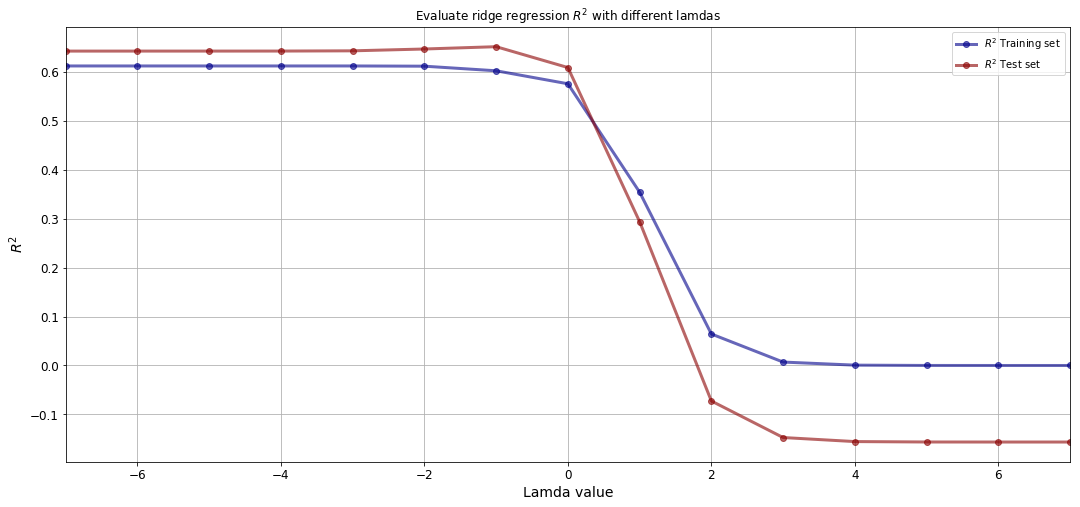

In [320]:
# Run for different values of lambda 
lambda_min = -7
lambda_max = 7

num_lambdas = 15
num_predictors = x.shape[1]

lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

train_r_squared = np.zeros(num_lambdas)
test_r_squared = np.zeros(num_lambdas)

coeff_a = np.zeros((num_lambdas, num_predictors))

for ind, i in enumerate(lambdas):    
    # Fit ridge regression on train set
    reg = Ridge_Reg(alpha = 10**i)
    reg.fit(x_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    # Evaluate train & test performance
    train_r_squared[ind] = reg.score(x_train, y_train)
    test_r_squared[ind] = reg.score(x_test, y_test)
    
    # Plotting
plt.figure(figsize=(18, 8))
plt.plot(lambdas, train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(lambdas, test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(lambda_min, lambda_max)
plt.title(r'Evaluate ridge regression $R^2$ with different lamdas')
plt.legend(loc='best')
plt.grid()

With each run of the above codes the plot is changing, although the best fit is always for very small lambdas, and the fit cannot be better than R^2 = 0,7, since the data set is an mosaic of random points.

Linear regression:

In [321]:
# scikit-learn code
reg = Lin_Reg()

reg.fit(x_train, y_train)

sklearn_pred = reg.predict(x_test)

Ridged regression:

In [322]:
# pyRidge code
rig = Ridge(num_iters=4000, alpha=.00001, beta=0.05)

rig.fit(x_train, y_train)

outs = rig.predict(x_test)

And at last, let's see how both looks like:

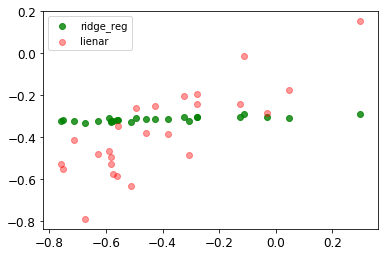

In [323]:
plt.scatter(y_test, outs, color='g', alpha=0.8, label='ridge_reg')
#plt.scatter(y_test, x_test, color='b', alpha=0.8, label='ridge_reg')
plt.scatter(y_test, sklearn_pred, color='r', alpha=0.4, label='lienar')
#plt.plot(x_test, color='b', alpha=0.8, label='ridge_reg')
#plt.plot([0, .5], [0, .5], 'k-', lw=2)

plt.legend()
plt.show()

As a conclusion, it's clearly visible that neither linear regression, nor ridge regression can perfecly fit into such data set. Although it's worth noticing, that ridge regression is coming down with it's predtiction to a line going through the middle of the data set. That's the best possible fit, which this type of regression is trying to get. For linear regression, the fit is very poor.

Choosing the other data set would most likely provide more "sane" outcome, although in this case we can see vastly different behaviours of both types of regression.

Sources:
https://github.com/vikasrtr/pyRidge/blob/master/models/RidgeGradientDescent.py